In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [4]:
#read in the general csv too
df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/agonist_low_ddg_delta_scores.csv")

In [5]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [6]:
len(df_general)

6949767

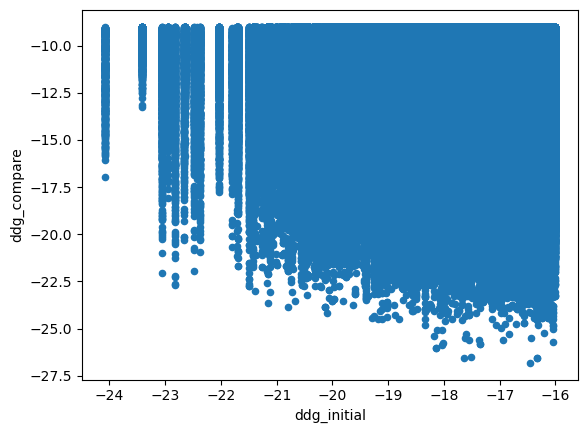

In [7]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

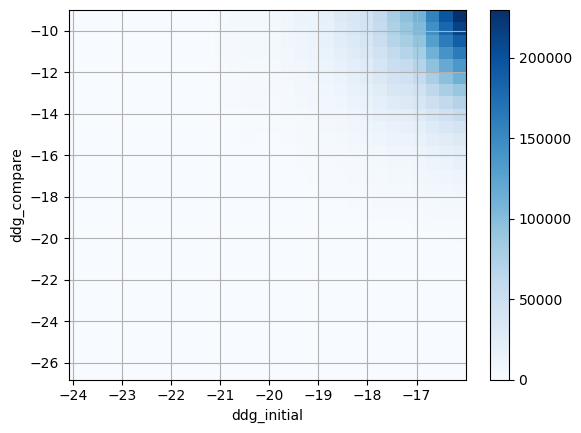

In [8]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

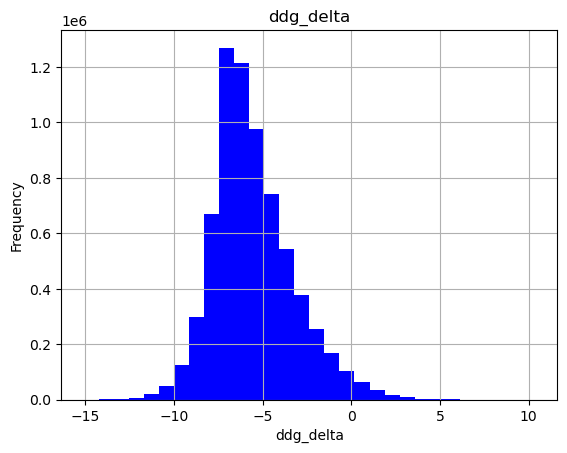

In [9]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

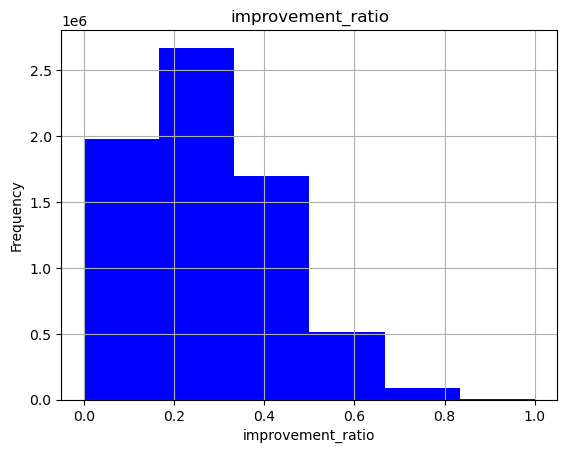

In [10]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [11]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 6) & (df_general['real_motif_ratio_compare'] >= 0.5) & (df_general['ddg_delta'] > -100) & (df_general['ddg_compare'] <= -7)]

In [12]:
df_general_filtered

file_initial  \
26339     /scratch/abgvg9/discovery_results/top_1000_placement/8109/placements/7l1u_receptor_only_PV-000266743593_1_1.pdb   
27751     /scratch/abgvg9/discovery_results/top_1000_placement/8109/placements/7l1u_receptor_only_PV-000266743593_1_1.pdb   
48746    /scratch/abgvg9/discovery_results/top_1000_placement/8674/placements/7l1u_receptor_only_PV-000405872249_13_0.pdb   
79130    /scratch/abgvg9/discovery_results/top_1000_placement/8359/placements/7l1u_receptor_only_PV-000489428566_13_1.pdb   
137312    /scratch/abgvg9/discovery_results/top_1000_placement/7613/placements/7l1u_receptor_only_PV-000573260217_7_1.pdb   
...                                                                                                                   ...   
6939220       /scratch/abgvg9/discovery_results/top_1000_placement/1853/placements/7l1u_receptor_only_Z738299286_10_2.pdb   
6939517       /scratch/abgvg9/discovery_results/top_1000_placement/1853/placements/7l1u_receptor_only_Z738299286_10_2.pdb   
6939650       /scratch/abgvg9/discovery_results/top_1000_placement/1853/placements/7l1u_receptor_only_Z738299286_10_2.pdb   
6939695       /scratch/abgvg9/discovery_results/top_1000_placement/1853/placements/7l1u_receptor_only_Z738299286_10_2.pdb   
6939698       /scratch/abgvg9/discovery_results/top_1000_placement/1853/placements/7l1u_receptor_only_Z738299286_10_2.pdb   

                                                                                                                                                                         file_compare  \
26339    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000266743593/placements/7l1u_receptor_only_PV-000266743593_128_25.pdb   
27751    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000266743593/placements/7l1u_receptor_only_PV-000266743593_128_25.pdb   
48746      /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000405872249/placements/7l1u_receptor_only_PV-000405872249_28_5.pdb   
79130      /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000489428566/placements/7l1u_receptor_only_PV-000489428566_31_0.pdb   
137312     /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000573260217/placements/7l1u_receptor_only_PV-000573260217_59_1.pdb   
...                                                                                                                                                                               ...   
6939220              /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z738299286/placements/7l1u_receptor_only_Z738299286_50_1.pdb   
6939517              /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z738299286/placements/7l1u_receptor_only_Z738299286_57_1.pdb   
6939650              /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z738299286/placements/7l1u_receptor_only_Z738299286_41_1.pdb   
6939695              /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z738299286/placements/7l1u_receptor_only_Z738299286_50_1.pdb   
6939698              /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z738299286/placements/7l1u_receptor_only_Z738299286_41_1.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
26339     -16.537063    -9.860485  -6.676578                   8.0   
27751     -16.537063    -9.860485  -6.676578                   8.0   
48746     -16.240085   -12.598557  -3.641528                   8.0   
79130     -19.500429    -9.457171 -10.043258                   8.0   
137312    -16.418127   -15.102328  -1

In [13]:
len(df_general_filtered)

816

In [14]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [15]:
df_general_filtered_lite

file_initial  \
3        /scratch/abgvg9/discovery_results/top_1000_placement/9798/placements/7l1u_receptor_only_PV-000233538198_4_5.pdb   
4        /scratch/abgvg9/discovery_results/top_1000_placement/9798/placements/7l1u_receptor_only_PV-000233538198_4_5.pdb   
5        /scratch/abgvg9/discovery_results/top_1000_placement/9798/placements/7l1u_receptor_only_PV-000233538198_4_5.pdb   
17       /scratch/abgvg9/discovery_results/top_1000_placement/9798/placements/7l1u_receptor_only_PV-000233538198_4_5.pdb   
24       /scratch/abgvg9/discovery_results/top_1000_placement/9798/placements/7l1u_receptor_only_PV-000233538198_4_5.pdb   
...                                                                                                                  ...   
6957135      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957146      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957147      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957148      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957150      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   

                                                                                                                                                                         file_compare  \
3          /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000233538198/placements/7l1u_receptor_only_PV-000233538198_89_9.pdb   
4         /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000233538198/placements/7l1u_receptor_only_PV-000233538198_140_0.pdb   
5          /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000233538198/placements/7l1u_receptor_only_PV-000233538198_49_5.pdb   
17         /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000233538198/placements/7l1u_receptor_only_PV-000233538198_27_7.pdb   
24       /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000233538198/placements/7l1u_receptor_only_PV-000233538198_102_45.pdb   
...                                                                                                                                                                               ...   
6957135              /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_60_9.pdb   
6957146             /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_15_38.pdb   
6957147             /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_12_29.pdb   
6957148              /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_8_58.pdb   
6957150             /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_15_39.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
3         -19.688718   -11.545660  -8.143058                  10.0   
4         -19.688718   -13.373225  -6.315493                  10.0   
5         -19.688718   -11.324723  -8.363995                  10.0   
17        -19.688718   -12.638626  -7.050092                  10.0   
24        -19.688718   -10.028576  -9.660142    

In [16]:
len(df_general_filtered_lite)

298713

In [17]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [18]:
len(df_recoveries)

24234

In [19]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [20]:
len(closest_recovery_general_df)

7278

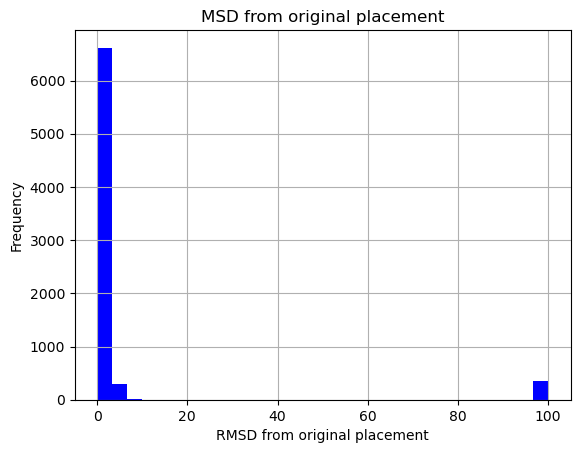

In [21]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('MSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [22]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

6773

In [23]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.930612805715856

In [24]:
systems_with_a_close_recovery_df

file_initial  \
6911687       /scratch/abgvg9/discovery_results/top_1000_placement/100/placements/7l1u_receptor_only_Z4457523953_12_16.pdb   
5449258   /scratch/abgvg9/discovery_results/top_1000_placement/10001/placements/7l1u_receptor_only_PV-006690961802_3_4.pdb   
5450714  /scratch/abgvg9/discovery_results/top_1000_placement/10003/placements/7l1u_receptor_only_PV-006690999388_10_0.pdb   
5451352   /scratch/abgvg9/discovery_results/top_1000_placement/10004/placements/7l1u_receptor_only_PV-006691003510_8_1.pdb   
5452400  /scratch/abgvg9/discovery_results/top_1000_placement/10004/placements/7l1u_receptor_only_PV-006691003823_10_0.pdb   
...                                                                                                                    ...   
5444369   /scratch/abgvg9/discovery_results/top_1000_placement/9992/placements/7l1u_receptor_only_PV-006690871171_12_3.pdb   
5446239    /scratch/abgvg9/discovery_results/top_1000_placement/9996/placements/7l1u_receptor_only_PV-006690907881_2_0.pdb   
5446578    /scratch/abgvg9/discovery_results/top_1000_placement/9997/placements/7l1u_receptor_only_PV-006690911219_4_5.pdb   
5447807    /scratch/abgvg9/discovery_results/top_1000_placement/9997/placements/7l1u_receptor_only_PV-006690923482_6_0.pdb   
5447886    /scratch/abgvg9/discovery_results/top_1000_placement/9998/placements/7l1u_receptor_only_PV-006690931100_8_0.pdb   

                                                                                                                                                                         file_compare  \
6911687           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z4457523953/placements/7l1u_receptor_only_Z4457523953_98_33.pdb   
5449258  /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690961802/placements/7l1u_receptor_only_PV-006690961802_127_15.pdb   
5450714    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690999388/placements/7l1u_receptor_only_PV-006690999388_33_0.pdb   
5451352    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006691003510/placements/7l1u_receptor_only_PV-006691003510_19_4.pdb   
5452400   /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006691003823/placements/7l1u_receptor_only_PV-006691003823_202_0.pdb   
...                                                                                                                                                                               ...   
5444369   /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690871171/placements/7l1u_receptor_only_PV-006690871171_79_35.pdb   
5446239   /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690907881/placements/7l1u_receptor_only_PV-006690907881_148_1.pdb   
5446578   /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690911219/placements/7l1u_receptor_only_PV-006690911219_138_6.pdb   
5447807     /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690923482/placements/7l1u_receptor_only_PV-006690923482_2_0.pdb   
5447886    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690931100/placements/7l1u_receptor_only_PV-006690931100_76_3.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
6911687   -17.829066   -16.510272  -1.318794                   8.0   
5449258   -17.571964   -14.737566  -2.834398                   6.0   
5450714   -16.796181   -11.255084  -5.541097                   7.0   
5451352   -17.039133   -12.038793  -5.000340                   8.0   
5452400   -16.982723   -16

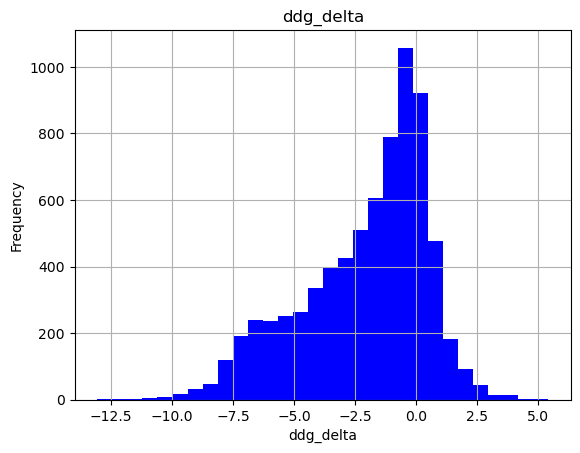

In [25]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [26]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

505

In [27]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.069387194284144

In [28]:
systems_without_a_close_recovery_df

file_initial  \
5463318   /scratch/abgvg9/discovery_results/top_1000_placement/10029/placements/7l1u_receptor_only_PV-006691303068_4_0.pdb   
5463963  /scratch/abgvg9/discovery_results/top_1000_placement/10030/placements/7l1u_receptor_only_PV-006691320417_15_3.pdb   
5465488   /scratch/abgvg9/discovery_results/top_1000_placement/10034/placements/7l1u_receptor_only_PV-006691370761_9_3.pdb   
765012   /scratch/abgvg9/discovery_results/top_1000_placement/10059/placements/7l1u_receptor_only_PV-002498441723_6_25.pdb   
5495738   /scratch/abgvg9/discovery_results/top_1000_placement/10085/placements/7l1u_receptor_only_PV-006691981333_6_2.pdb   
...                                                                                                                    ...   
5376333   /scratch/abgvg9/discovery_results/top_1000_placement/9859/placements/7l1u_receptor_only_PV-006689266347_11_3.pdb   
5402215    /scratch/abgvg9/discovery_results/top_1000_placement/9891/placements/7l1u_receptor_only_PV-006689633684_4_7.pdb   
5408084   /scratch/abgvg9/discovery_results/top_1000_placement/9911/placements/7l1u_receptor_only_PV-006689884562_14_0.pdb   
5421801   /scratch/abgvg9/discovery_results/top_1000_placement/9935/placements/7l1u_receptor_only_PV-006690182469_11_0.pdb   
5439343   /scratch/abgvg9/discovery_results/top_1000_placement/9982/placements/7l1u_receptor_only_PV-006690744953_13_0.pdb   

                                                                                                                                                                        file_compare  \
5463318    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006691303068/placements/7l1u_receptor_only_PV-006691303068_5_0.pdb   
5463963   /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006691320417/placements/7l1u_receptor_only_PV-006691320417_27_1.pdb   
5465488  /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006691370761/placements/7l1u_receptor_only_PV-006691370761_168_0.pdb   
765012     /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-002498441723/placements/7l1u_receptor_only_PV-002498441723_1_3.pdb   
5495738  /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006691981333/placements/7l1u_receptor_only_PV-006691981333_76_10.pdb   
...                                                                                                                                                                              ...   
5376333    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006689266347/placements/7l1u_receptor_only_PV-006689266347_8_1.pdb   
5402215    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006689633684/placements/7l1u_receptor_only_PV-006689633684_2_8.pdb   
5408084    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006689884562/placements/7l1u_receptor_only_PV-006689884562_1_0.pdb   
5421801  /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690182469/placements/7l1u_receptor_only_PV-006690182469_105_0.pdb   
5439343  /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-006690744953/placements/7l1u_receptor_only_PV-006690744953_125_5.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
5463318   -16.111113   -13.185066  -2.926047                   8.0   
5463963   -16.806024    -9.148342  -7.657682                   8.0   
5465488   -18.974967   -11.136191  -7.838776                   9.0   
765012    -16.159033    -9.506766  -6.652267                  12.0   
5495738   -17.414310   -13.270902  -4.

In [29]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

file_initial  \
12510    /scratch/abgvg9/discovery_results/top_1000_placement/8738/placements/7l1u_receptor_only_PV-000238589698_12_2.pdb   
12609    /scratch/abgvg9/discovery_results/top_1000_placement/8738/placements/7l1u_receptor_only_PV-000238589698_12_2.pdb   
13383    /scratch/abgvg9/discovery_results/top_1000_placement/8738/placements/7l1u_receptor_only_PV-000238589698_12_2.pdb   
13384    /scratch/abgvg9/discovery_results/top_1000_placement/8738/placements/7l1u_receptor_only_PV-000238589698_12_2.pdb   
13709    /scratch/abgvg9/discovery_results/top_1000_placement/7223/placements/7l1u_receptor_only_PV-000238906195_12_1.pdb   
...                                                                                                                   ...   
6897672       /scratch/abgvg9/discovery_results/top_1000_placement/199/placements/7l1u_receptor_only_Z3878403833_10_0.pdb   
6900354       /scratch/abgvg9/discovery_results/top_1000_placement/1437/placements/7l1u_receptor_only_Z4122981137_4_9.pdb   
6903787       /scratch/abgvg9/discovery_results/top_1000_placement/1437/placements/7l1u_receptor_only_Z4122981137_4_9.pdb   
6926203        /scratch/abgvg9/discovery_results/top_1000_placement/95/placements/7l1u_receptor_only_Z5001135493_12_6.pdb   
6927069        /scratch/abgvg9/discovery_results/top_1000_placement/95/placements/7l1u_receptor_only_Z5001135493_12_6.pdb   

                                                                                                                                                                        file_compare  \
12510    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000238589698/placements/7l1u_receptor_only_PV-000238589698_121_4.pdb   
12609    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000238589698/placements/7l1u_receptor_only_PV-000238589698_140_1.pdb   
13383    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000238589698/placements/7l1u_receptor_only_PV-000238589698_121_4.pdb   
13384    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000238589698/placements/7l1u_receptor_only_PV-000238589698_140_1.pdb   
13709     /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000238906195/placements/7l1u_receptor_only_PV-000238906195_25_1.pdb   
...                                                                                                                                                                              ...   
6897672          /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z3878403833/placements/7l1u_receptor_only_Z3878403833_152_1.pdb   
6900354          /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z4122981137/placements/7l1u_receptor_only_Z4122981137_13_18.pdb   
6903787          /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z4122981137/placements/7l1u_receptor_only_Z4122981137_13_18.pdb   
6926203          /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z5001135493/placements/7l1u_receptor_only_Z5001135493_182_6.pdb   
6927069          /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z5001135493/placements/7l1u_receptor_only_Z5001135493_182_6.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
12510     -16.703987   -17.602754   0.898767                  10.0   
12609     -16.703987   -18.331254   1.627267                  10.0   
13383     -16.703987   -17.602754   0.898767                  10.0   
13384     -16.703987   -18.331254   1.627267                  10.0   
13709     -16.011445   -18.564197   2.552752     

In [30]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

file_initial  \
7103     /scratch/abgvg9/discovery_results/top_1000_placement/4209/placements/7l1u_receptor_only_PV-000234102360_2_1.pdb   
7128     /scratch/abgvg9/discovery_results/top_1000_placement/4209/placements/7l1u_receptor_only_PV-000234102360_2_1.pdb   
7302     /scratch/abgvg9/discovery_results/top_1000_placement/4209/placements/7l1u_receptor_only_PV-000234102360_2_1.pdb   
7790     /scratch/abgvg9/discovery_results/top_1000_placement/4209/placements/7l1u_receptor_only_PV-000234102360_2_1.pdb   
7791     /scratch/abgvg9/discovery_results/top_1000_placement/4209/placements/7l1u_receptor_only_PV-000234102360_2_1.pdb   
...                                                                                                                  ...   
6957146      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957147      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957148      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957149      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   
6957150      /scratch/abgvg9/discovery_results/top_1000_placement/1426/placements/7l1u_receptor_only_Z994881780_13_6.pdb   

                                                                                                                                                                       file_compare  \
7103      /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000234102360/placements/7l1u_receptor_only_PV-000234102360_4_1.pdb   
7128      /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000234102360/placements/7l1u_receptor_only_PV-000234102360_4_2.pdb   
7302     /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000234102360/placements/7l1u_receptor_only_PV-000234102360_14_2.pdb   
7790      /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000234102360/placements/7l1u_receptor_only_PV-000234102360_4_1.pdb   
7791      /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000234102360/placements/7l1u_receptor_only_PV-000234102360_4_2.pdb   
...                                                                                                                                                                             ...   
6957146           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_15_38.pdb   
6957147           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_12_29.pdb   
6957148            /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_8_58.pdb   
6957149           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_15_42.pdb   
6957150           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z994881780/placements/7l1u_receptor_only_Z994881780_15_39.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
7103      -16.387839   -19.013632   2.625793                   8.0   
7128      -16.387839   -18.689372   2.301533                   8.0   
7302      -16.387839   -11.044973  -5.342866                   8.0   
7790      -16.387839   -19.013632   2.625793                   8.0   
7791      -16.387839   -18.689372   2.301533                   8.0   
..

In [39]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -15) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


203

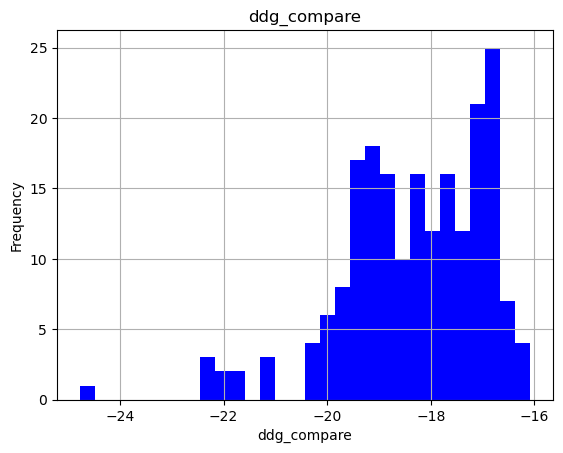

In [40]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddg_compare')
plt.ylabel('Frequency')
plt.title('ddg_compare')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [41]:
df_general_high_hbonds

file_initial  \
80113      /scratch/abgvg9/discovery_results/top_1000_placement/9160/placements/7l1u_receptor_only_PV-000492098021_1_0.pdb   
223145     /scratch/abgvg9/discovery_results/top_1000_placement/1779/placements/7l1u_receptor_only_PV-001117749312_4_1.pdb   
223893     /scratch/abgvg9/discovery_results/top_1000_placement/1779/placements/7l1u_receptor_only_PV-001117749312_4_1.pdb   
230977   /scratch/abgvg9/discovery_results/top_1000_placement/7159/placements/7l1u_receptor_only_PV-001123528796_13_13.pdb   
231124   /scratch/abgvg9/discovery_results/top_1000_placement/7159/placements/7l1u_receptor_only_PV-001123528796_13_13.pdb   
...                                                                                                                    ...   
6897366        /scratch/abgvg9/discovery_results/top_1000_placement/199/placements/7l1u_receptor_only_Z3878403833_10_0.pdb   
6897668        /scratch/abgvg9/discovery_results/top_1000_placement/199/placements/7l1u_receptor_only_Z3878403833_10_0.pdb   
6897669        /scratch/abgvg9/discovery_results/top_1000_placement/199/placements/7l1u_receptor_only_Z3878403833_10_0.pdb   
6897670        /scratch/abgvg9/discovery_results/top_1000_placement/199/placements/7l1u_receptor_only_Z3878403833_10_0.pdb   
6897672        /scratch/abgvg9/discovery_results/top_1000_placement/199/placements/7l1u_receptor_only_Z3878403833_10_0.pdb   

                                                                                                                                                                         file_compare  \
80113    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-000492098021/placements/7l1u_receptor_only_PV-000492098021_193_18.pdb   
223145     /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-001117749312/placements/7l1u_receptor_only_PV-001117749312_16_4.pdb   
223893     /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-001117749312/placements/7l1u_receptor_only_PV-001117749312_16_4.pdb   
230977      /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-001123528796/placements/7l1u_receptor_only_PV-001123528796_8_5.pdb   
231124    /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/PV-001123528796/placements/7l1u_receptor_only_PV-001123528796_13_17.pdb   
...                                                                                                                                                                               ...   
6897366           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z3878403833/placements/7l1u_receptor_only_Z3878403833_152_1.pdb   
6897668           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z3878403833/placements/7l1u_receptor_only_Z3878403833_153_6.pdb   
6897669           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z3878403833/placements/7l1u_receptor_only_Z3878403833_151_8.pdb   
6897670           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z3878403833/placements/7l1u_receptor_only_Z3878403833_148_5.pdb   
6897672           /scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/agonist_low_ddg/Z3878403833/placements/7l1u_receptor_only_Z3878403833_152_1.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
80113     -16.022109   -16.387415   0.365306                   8.0   
223145    -17.061640   -19.921026   2.859386                   8.0   
223893    -17.061640   -19.921026   2.859386                   8.0   
230977    -16.255914   -18.161994   1.906080                   8.0   
231124    -16.255914   -16

In [42]:
len(df_general_high_hbonds)

203

In [43]:
# Extract ligand names using a regular expression
df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_general_high_hbonds['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000492098021' 'PV-001117749312' 'PV-001123528796' 'PV-001414491899'
 'PV-001472713647' 'PV-001519092420' 'PV-001644551683' 'PV-002445533337'
 'PV-003145840616' 'PV-004733106883' 'PV-004794263713' 'PV-004838536315'
 'PV-004865316654' 'PV-005185091470' 'PV-005778229293' 'PV-005830160720'
 'PV-005867990988' 'PV-005934884553' 'PV-006544139142' 'PV-006607764516'
 'PV-006608113292' 'PV-006609419067' 'PV-006611775673' 'PV-006612169751'
 'PV-006613293977' 'PV-006614933798' 'PV-006615292272' 'PV-006616904768'
 'PV-006623857598' 'PV-006626023038' 'PV-006635286970' 'PV-006637420133'
 'PV-006638947802' 'PV-006641535091' 'PV-006642017745' 'PV-006646068273'
 'PV-006650520422' 'PV-006651572791' 'PV-006653467669' 'PV-006655328768'
 'PV-006655396134' 'PV-006655437891' 'PV-006656915426' 'PV-006657439603'
 'PV-006657995737' 'PV-006658969432' 'PV-006659332754' 'PV-006661801653'
 'PV-006664811717' 'PV-006666130436' 'PV-006666199055' 'PV-006667477124'
 'PV-006667802895' 'PV-0066680

/scratch/local/ipykernel_92745/4240062569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')


In [44]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [45]:
line_counter = 0
folder_counter = 0

destination = "/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_general_high_hbonds.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv(destination + 'agonist_low_ddg_best_improved_placements_sheet.csv', index=False)

00000_initial_7l1u_receptor_only_PV-000492098021_1_0.pdb 00000_compare_7l1u_receptor_only_PV-000492098021_193_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00001_initial_7l1u_receptor_only_PV-001117749312_4_1.pdb 00001_compare_7l1u_receptor_only_PV-001117749312_16_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00002_initial_7l1u_receptor_only_PV-001117749312_4_1.pdb 00002_compare_7l1u_receptor_only_PV-001117749312_16_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00003_initial_7l1u_receptor_only_PV-001123528796_13_13.pdb 00003_compare_7l1u_receptor_only_PV-001123528796_8_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00004_initial_7l1u_receptor_only_PV-001123528796_13_13.pdb 00004_compare_7l1u_receptor_only_PV-001123528796_13_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00005_initial_7l1u_receptor_only_PV-001123528796_13_13.pdb 00005_compare_7l1u_receptor_only_PV-001123528796_13_15.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00006_initial_7l1u_receptor_only_PV-001123528796_13_13.pdb 00006_compare_7l1u_receptor_only_PV-001123528796_8_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00007_initial_7l1u_receptor_only_PV-001414491899_15_2.pdb 00007_compare_7l1u_receptor_only_PV-001414491899_216_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00008_initial_7l1u_receptor_only_PV-001414491899_15_2.pdb 00008_compare_7l1u_receptor_only_PV-001414491899_216_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00009_initial_7l1u_receptor_only_PV-001472713647_5_2.pdb 00009_compare_7l1u_receptor_only_PV-001472713647_191_25.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00010_initial_7l1u_receptor_only_PV-001519092420_6_5.pdb 00010_compare_7l1u_receptor_only_PV-001519092420_198_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00011_initial_7l1u_receptor_only_PV-001644551683_13_12.pdb 00011_compare_7l1u_receptor_only_PV-001644551683_57_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00012_initial_7l1u_receptor_only_PV-001644551683_13_12.pdb 00012_compare_7l1u_receptor_only_PV-001644551683_57_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00013_initial_7l1u_receptor_only_PV-002445533337_14_0.pdb 00013_compare_7l1u_receptor_only_PV-002445533337_26_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00014_initial_7l1u_receptor_only_PV-002445533337_14_0.pdb 00014_compare_7l1u_receptor_only_PV-002445533337_26_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00015_initial_7l1u_receptor_only_PV-003145840616_7_3.pdb 00015_compare_7l1u_receptor_only_PV-003145840616_106_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00016_initial_7l1u_receptor_only_PV-003145840616_7_3.pdb 00016_compare_7l1u_receptor_only_PV-003145840616_106_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00017_initial_7l1u_receptor_only_PV-004733106883_2_2.pdb 00017_compare_7l1u_receptor_only_PV-004733106883_81_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00018_initial_7l1u_receptor_only_PV-004733106883_2_2.pdb 00018_compare_7l1u_receptor_only_PV-004733106883_81_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00019_initial_7l1u_receptor_only_PV-004794263713_11_2.pdb 00019_compare_7l1u_receptor_only_PV-004794263713_29_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00020_initial_7l1u_receptor_only_PV-004794263713_11_2.pdb 00020_compare_7l1u_receptor_only_PV-004794263713_29_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00021_initial_7l1u_receptor_only_PV-004838536315_1_3.pdb 00021_compare_7l1u_receptor_only_PV-004838536315_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00022_initial_7l1u_receptor_only_PV-004838536315_1_3.pdb 00022_compare_7l1u_receptor_only_PV-004838536315_67_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00023_initial_7l1u_receptor_only_PV-004838536315_1_4.pdb 00023_compare_7l1u_receptor_only_PV-004838536315_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00024_initial_7l1u_receptor_only_PV-004838536315_1_4.pdb 00024_compare_7l1u_receptor_only_PV-004838536315_67_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00025_initial_7l1u_receptor_only_PV-004838536315_1_3.pdb 00025_compare_7l1u_receptor_only_PV-004838536315_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00026_initial_7l1u_receptor_only_PV-004838536315_1_3.pdb 00026_compare_7l1u_receptor_only_PV-004838536315_67_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00027_initial_7l1u_receptor_only_PV-004838536315_1_4.pdb 00027_compare_7l1u_receptor_only_PV-004838536315_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00028_initial_7l1u_receptor_only_PV-004838536315_1_4.pdb 00028_compare_7l1u_receptor_only_PV-004838536315_67_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00029_initial_7l1u_receptor_only_PV-004865316654_13_5.pdb 00029_compare_7l1u_receptor_only_PV-004865316654_62_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00030_initial_7l1u_receptor_only_PV-004865316654_13_5.pdb 00030_compare_7l1u_receptor_only_PV-004865316654_62_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00031_initial_7l1u_receptor_only_PV-005185091470_15_4.pdb 00031_compare_7l1u_receptor_only_PV-005185091470_157_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00032_initial_7l1u_receptor_only_PV-005185091470_15_4.pdb 00032_compare_7l1u_receptor_only_PV-005185091470_103_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00033_initial_7l1u_receptor_only_PV-005185091470_15_4.pdb 00033_compare_7l1u_receptor_only_PV-005185091470_157_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00034_initial_7l1u_receptor_only_PV-005185091470_15_4.pdb 00034_compare_7l1u_receptor_only_PV-005185091470_103_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00035_initial_7l1u_receptor_only_PV-005778229293_6_1.pdb 00035_compare_7l1u_receptor_only_PV-005778229293_76_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00036_initial_7l1u_receptor_only_PV-005830160720_14_10.pdb 00036_compare_7l1u_receptor_only_PV-005830160720_50_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00037_initial_7l1u_receptor_only_PV-005867990988_10_7.pdb 00037_compare_7l1u_receptor_only_PV-005867990988_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00038_initial_7l1u_receptor_only_PV-005867990988_10_2.pdb 00038_compare_7l1u_receptor_only_PV-005867990988_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00039_initial_7l1u_receptor_only_PV-005867990988_10_7.pdb 00039_compare_7l1u_receptor_only_PV-005867990988_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00040_initial_7l1u_receptor_only_PV-005867990988_10_2.pdb 00040_compare_7l1u_receptor_only_PV-005867990988_67_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00041_initial_7l1u_receptor_only_PV-005934884553_4_7.pdb 00041_compare_7l1u_receptor_only_PV-005934884553_128_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00042_initial_7l1u_receptor_only_PV-006544139142_8_1.pdb 00042_compare_7l1u_receptor_only_PV-006544139142_95_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00043_initial_7l1u_receptor_only_PV-006544139142_8_1.pdb 00043_compare_7l1u_receptor_only_PV-006544139142_95_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00044_initial_7l1u_receptor_only_PV-006544139142_8_1.pdb 00044_compare_7l1u_receptor_only_PV-006544139142_95_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00045_initial_7l1u_receptor_only_PV-006607764516_5_6.pdb 00045_compare_7l1u_receptor_only_PV-006607764516_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00046_initial_7l1u_receptor_only_PV-006607764516_5_5.pdb 00046_compare_7l1u_receptor_only_PV-006607764516_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00047_initial_7l1u_receptor_only_PV-006607764516_5_6.pdb 00047_compare_7l1u_receptor_only_PV-006607764516_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00048_initial_7l1u_receptor_only_PV-006607764516_5_5.pdb 00048_compare_7l1u_receptor_only_PV-006607764516_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/0’: File exists


00049_initial_7l1u_receptor_only_PV-006608113292_3_2.pdb 00049_compare_7l1u_receptor_only_PV-006608113292_103_30.pdb
00050_initial_7l1u_receptor_only_PV-006608113292_3_2.pdb 00050_compare_7l1u_receptor_only_PV-006608113292_139_42.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00051_initial_7l1u_receptor_only_PV-006608113292_3_2.pdb 00051_compare_7l1u_receptor_only_PV-006608113292_103_30.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00052_initial_7l1u_receptor_only_PV-006609419067_7_0.pdb 00052_compare_7l1u_receptor_only_PV-006609419067_38_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00053_initial_7l1u_receptor_only_PV-006609419067_7_0.pdb 00053_compare_7l1u_receptor_only_PV-006609419067_38_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00054_initial_7l1u_receptor_only_PV-006611775673_7_6.pdb 00054_compare_7l1u_receptor_only_PV-006611775673_122_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00055_initial_7l1u_receptor_only_PV-006612169751_13_34.pdb 00055_compare_7l1u_receptor_only_PV-006612169751_27_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00056_initial_7l1u_receptor_only_PV-006612169751_13_34.pdb 00056_compare_7l1u_receptor_only_PV-006612169751_29_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00057_initial_7l1u_receptor_only_PV-006613293977_8_0.pdb 00057_compare_7l1u_receptor_only_PV-006613293977_193_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00058_initial_7l1u_receptor_only_PV-006613293977_8_0.pdb 00058_compare_7l1u_receptor_only_PV-006613293977_193_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00059_initial_7l1u_receptor_only_PV-006614933798_10_1.pdb 00059_compare_7l1u_receptor_only_PV-006614933798_190_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00060_initial_7l1u_receptor_only_PV-006614933798_10_1.pdb 00060_compare_7l1u_receptor_only_PV-006614933798_190_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00061_initial_7l1u_receptor_only_PV-006615292272_13_3.pdb 00061_compare_7l1u_receptor_only_PV-006615292272_172_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00062_initial_7l1u_receptor_only_PV-006615292272_13_3.pdb 00062_compare_7l1u_receptor_only_PV-006615292272_173_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00063_initial_7l1u_receptor_only_PV-006615292272_13_3.pdb 00063_compare_7l1u_receptor_only_PV-006615292272_173_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00064_initial_7l1u_receptor_only_PV-006616904768_9_1.pdb 00064_compare_7l1u_receptor_only_PV-006616904768_141_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00065_initial_7l1u_receptor_only_PV-006623857598_8_7.pdb 00065_compare_7l1u_receptor_only_PV-006623857598_50_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00066_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00066_compare_7l1u_receptor_only_PV-006626023038_58_36.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00067_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00067_compare_7l1u_receptor_only_PV-006626023038_50_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00068_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00068_compare_7l1u_receptor_only_PV-006626023038_43_39.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00069_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00069_compare_7l1u_receptor_only_PV-006626023038_64_31.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00070_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00070_compare_7l1u_receptor_only_PV-006626023038_50_32.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00071_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00071_compare_7l1u_receptor_only_PV-006626023038_50_34.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00072_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00072_compare_7l1u_receptor_only_PV-006626023038_56_42.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00073_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00073_compare_7l1u_receptor_only_PV-006626023038_58_36.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00074_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00074_compare_7l1u_receptor_only_PV-006626023038_50_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00075_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00075_compare_7l1u_receptor_only_PV-006626023038_43_39.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00076_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00076_compare_7l1u_receptor_only_PV-006626023038_64_31.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00077_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00077_compare_7l1u_receptor_only_PV-006626023038_50_32.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00078_initial_7l1u_receptor_only_PV-006626023038_3_14.pdb 00078_compare_7l1u_receptor_only_PV-006626023038_56_42.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00079_initial_7l1u_receptor_only_PV-006635286970_12_0.pdb 00079_compare_7l1u_receptor_only_PV-006635286970_54_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00080_initial_7l1u_receptor_only_PV-006635286970_12_0.pdb 00080_compare_7l1u_receptor_only_PV-006635286970_54_20.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00081_initial_7l1u_receptor_only_PV-006637420133_10_3.pdb 00081_compare_7l1u_receptor_only_PV-006637420133_181_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00082_initial_7l1u_receptor_only_PV-006638947802_6_1.pdb 00082_compare_7l1u_receptor_only_PV-006638947802_240_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00083_initial_7l1u_receptor_only_PV-006641535091_10_6.pdb 00083_compare_7l1u_receptor_only_PV-006641535091_95_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00084_initial_7l1u_receptor_only_PV-006642017745_11_3.pdb 00084_compare_7l1u_receptor_only_PV-006642017745_175_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00085_initial_7l1u_receptor_only_PV-006642017745_11_3.pdb 00085_compare_7l1u_receptor_only_PV-006642017745_175_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00086_initial_7l1u_receptor_only_PV-006646068273_9_12.pdb 00086_compare_7l1u_receptor_only_PV-006646068273_182_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00087_initial_7l1u_receptor_only_PV-006646068273_9_12.pdb 00087_compare_7l1u_receptor_only_PV-006646068273_185_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00088_initial_7l1u_receptor_only_PV-006646068273_9_12.pdb 00088_compare_7l1u_receptor_only_PV-006646068273_182_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00089_initial_7l1u_receptor_only_PV-006650520422_5_0.pdb 00089_compare_7l1u_receptor_only_PV-006650520422_44_34.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00090_initial_7l1u_receptor_only_PV-006651572791_1_18.pdb 00090_compare_7l1u_receptor_only_PV-006651572791_4_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00091_initial_7l1u_receptor_only_PV-006653467669_6_0.pdb 00091_compare_7l1u_receptor_only_PV-006653467669_158_28.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00092_initial_7l1u_receptor_only_PV-006655328768_6_1.pdb 00092_compare_7l1u_receptor_only_PV-006655328768_7_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00093_initial_7l1u_receptor_only_PV-006655396134_6_0.pdb 00093_compare_7l1u_receptor_only_PV-006655396134_102_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00094_initial_7l1u_receptor_only_PV-006655437891_10_4.pdb 00094_compare_7l1u_receptor_only_PV-006655437891_137_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00095_initial_7l1u_receptor_only_PV-006655437891_10_4.pdb 00095_compare_7l1u_receptor_only_PV-006655437891_138_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00096_initial_7l1u_receptor_only_PV-006655437891_10_4.pdb 00096_compare_7l1u_receptor_only_PV-006655437891_138_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00097_initial_7l1u_receptor_only_PV-006655437891_10_4.pdb 00097_compare_7l1u_receptor_only_PV-006655437891_137_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00098_initial_7l1u_receptor_only_PV-006655437891_10_4.pdb 00098_compare_7l1u_receptor_only_PV-006655437891_138_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/1’: File exists


00099_initial_7l1u_receptor_only_PV-006655437891_10_4.pdb 00099_compare_7l1u_receptor_only_PV-006655437891_138_16.pdb
00100_initial_7l1u_receptor_only_PV-006656915426_7_0.pdb 00100_compare_7l1u_receptor_only_PV-006656915426_136_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00101_initial_7l1u_receptor_only_PV-006656915426_7_0.pdb 00101_compare_7l1u_receptor_only_PV-006656915426_136_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00102_initial_7l1u_receptor_only_PV-006657439603_15_3.pdb 00102_compare_7l1u_receptor_only_PV-006657439603_139_40.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00103_initial_7l1u_receptor_only_PV-006657439603_15_3.pdb 00103_compare_7l1u_receptor_only_PV-006657439603_139_40.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00104_initial_7l1u_receptor_only_PV-006657995737_4_6.pdb 00104_compare_7l1u_receptor_only_PV-006657995737_6_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00105_initial_7l1u_receptor_only_PV-006657995737_4_6.pdb 00105_compare_7l1u_receptor_only_PV-006657995737_6_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00106_initial_7l1u_receptor_only_PV-006658969432_3_7.pdb 00106_compare_7l1u_receptor_only_PV-006658969432_90_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00107_initial_7l1u_receptor_only_PV-006659332754_14_4.pdb 00107_compare_7l1u_receptor_only_PV-006659332754_94_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00108_initial_7l1u_receptor_only_PV-006659332754_14_4.pdb 00108_compare_7l1u_receptor_only_PV-006659332754_94_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00109_initial_7l1u_receptor_only_PV-006661801653_9_0.pdb 00109_compare_7l1u_receptor_only_PV-006661801653_21_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00110_initial_7l1u_receptor_only_PV-006661801653_9_0.pdb 00110_compare_7l1u_receptor_only_PV-006661801653_21_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00111_initial_7l1u_receptor_only_PV-006664811717_7_0.pdb 00111_compare_7l1u_receptor_only_PV-006664811717_113_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00112_initial_7l1u_receptor_only_PV-006664811717_7_0.pdb 00112_compare_7l1u_receptor_only_PV-006664811717_113_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00113_initial_7l1u_receptor_only_PV-006666130436_2_3.pdb 00113_compare_7l1u_receptor_only_PV-006666130436_114_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00114_initial_7l1u_receptor_only_PV-006666130436_2_3.pdb 00114_compare_7l1u_receptor_only_PV-006666130436_114_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00115_initial_7l1u_receptor_only_PV-006666199055_5_4.pdb 00115_compare_7l1u_receptor_only_PV-006666199055_160_29.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00116_initial_7l1u_receptor_only_PV-006666199055_5_4.pdb 00116_compare_7l1u_receptor_only_PV-006666199055_160_27.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00117_initial_7l1u_receptor_only_PV-006666199055_5_4.pdb 00117_compare_7l1u_receptor_only_PV-006666199055_160_29.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00118_initial_7l1u_receptor_only_PV-006666199055_5_4.pdb 00118_compare_7l1u_receptor_only_PV-006666199055_160_27.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00119_initial_7l1u_receptor_only_PV-006667477124_9_6.pdb 00119_compare_7l1u_receptor_only_PV-006667477124_27_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00120_initial_7l1u_receptor_only_PV-006667477124_9_6.pdb 00120_compare_7l1u_receptor_only_PV-006667477124_27_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00121_initial_7l1u_receptor_only_PV-006667477124_9_6.pdb 00121_compare_7l1u_receptor_only_PV-006667477124_27_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00122_initial_7l1u_receptor_only_PV-006667477124_9_6.pdb 00122_compare_7l1u_receptor_only_PV-006667477124_27_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00123_initial_7l1u_receptor_only_PV-006667802895_6_0.pdb 00123_compare_7l1u_receptor_only_PV-006667802895_195_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00124_initial_7l1u_receptor_only_PV-006667802895_6_0.pdb 00124_compare_7l1u_receptor_only_PV-006667802895_195_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00125_initial_7l1u_receptor_only_PV-006668040734_12_0.pdb 00125_compare_7l1u_receptor_only_PV-006668040734_63_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00126_initial_7l1u_receptor_only_PV-006668040734_12_0.pdb 00126_compare_7l1u_receptor_only_PV-006668040734_63_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00127_initial_7l1u_receptor_only_PV-006668509049_6_0.pdb 00127_compare_7l1u_receptor_only_PV-006668509049_154_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00128_initial_7l1u_receptor_only_PV-006668509049_6_0.pdb 00128_compare_7l1u_receptor_only_PV-006668509049_154_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00129_initial_7l1u_receptor_only_PV-006670884734_9_0.pdb 00129_compare_7l1u_receptor_only_PV-006670884734_10_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00130_initial_7l1u_receptor_only_PV-006670884734_9_0.pdb 00130_compare_7l1u_receptor_only_PV-006670884734_10_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00131_initial_7l1u_receptor_only_PV-006671037624_12_10.pdb 00131_compare_7l1u_receptor_only_PV-006671037624_10_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00132_initial_7l1u_receptor_only_PV-006671037624_12_10.pdb 00132_compare_7l1u_receptor_only_PV-006671037624_10_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00133_initial_7l1u_receptor_only_PV-006673757637_9_1.pdb 00133_compare_7l1u_receptor_only_PV-006673757637_14_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00134_initial_7l1u_receptor_only_PV-006676728510_14_1.pdb 00134_compare_7l1u_receptor_only_PV-006676728510_98_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00135_initial_7l1u_receptor_only_PV-006676728510_14_1.pdb 00135_compare_7l1u_receptor_only_PV-006676728510_98_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00136_initial_7l1u_receptor_only_PV-006677293203_3_1.pdb 00136_compare_7l1u_receptor_only_PV-006677293203_104_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00137_initial_7l1u_receptor_only_PV-006677293203_3_1.pdb 00137_compare_7l1u_receptor_only_PV-006677293203_110_23.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00138_initial_7l1u_receptor_only_PV-006678601038_9_4.pdb 00138_compare_7l1u_receptor_only_PV-006678601038_126_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00139_initial_7l1u_receptor_only_PV-006685435339_14_11.pdb 00139_compare_7l1u_receptor_only_PV-006685435339_84_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00140_initial_7l1u_receptor_only_PV-006686295624_14_2.pdb 00140_compare_7l1u_receptor_only_PV-006686295624_59_15.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00141_initial_7l1u_receptor_only_PV-006688879098_5_0.pdb 00141_compare_7l1u_receptor_only_PV-006688879098_22_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00142_initial_7l1u_receptor_only_PV-006688879098_5_0.pdb 00142_compare_7l1u_receptor_only_PV-006688879098_22_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00143_initial_7l1u_receptor_only_PV-006695040576_9_9.pdb 00143_compare_7l1u_receptor_only_PV-006695040576_135_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00144_initial_7l1u_receptor_only_PV-006695040576_9_9.pdb 00144_compare_7l1u_receptor_only_PV-006695040576_54_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00145_initial_7l1u_receptor_only_PV-006695040576_9_9.pdb 00145_compare_7l1u_receptor_only_PV-006695040576_138_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00146_initial_7l1u_receptor_only_PV-006695040576_9_9.pdb 00146_compare_7l1u_receptor_only_PV-006695040576_73_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00147_initial_7l1u_receptor_only_PV-006695040576_9_9.pdb 00147_compare_7l1u_receptor_only_PV-006695040576_138_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00148_initial_7l1u_receptor_only_PV-006695040576_9_9.pdb 00148_compare_7l1u_receptor_only_PV-006695040576_54_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/2’: File exists


00149_initial_7l1u_receptor_only_PV-006695040576_9_9.pdb 00149_compare_7l1u_receptor_only_PV-006695040576_138_6.pdb
00150_initial_7l1u_receptor_only_PV-006695134867_7_0.pdb 00150_compare_7l1u_receptor_only_PV-006695134867_121_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00151_initial_7l1u_receptor_only_PV-006695134867_7_0.pdb 00151_compare_7l1u_receptor_only_PV-006695134867_176_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00152_initial_7l1u_receptor_only_PV-006695134867_7_0.pdb 00152_compare_7l1u_receptor_only_PV-006695134867_116_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00153_initial_7l1u_receptor_only_PV-006695134867_7_0.pdb 00153_compare_7l1u_receptor_only_PV-006695134867_171_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00154_initial_7l1u_receptor_only_PV-006695134867_7_0.pdb 00154_compare_7l1u_receptor_only_PV-006695134867_117_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00155_initial_7l1u_receptor_only_PV-006695134867_7_0.pdb 00155_compare_7l1u_receptor_only_PV-006695134867_116_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00156_initial_7l1u_receptor_only_PV-006695134867_7_0.pdb 00156_compare_7l1u_receptor_only_PV-006695134867_171_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00157_initial_7l1u_receptor_only_PV-006698074969_5_5.pdb 00157_compare_7l1u_receptor_only_PV-006698074969_191_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00158_initial_7l1u_receptor_only_PV-006698074969_5_6.pdb 00158_compare_7l1u_receptor_only_PV-006698074969_191_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00159_initial_7l1u_receptor_only_PV-006700404940_1_5.pdb 00159_compare_7l1u_receptor_only_PV-006700404940_8_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00160_initial_7l1u_receptor_only_PV-006700404940_1_5.pdb 00160_compare_7l1u_receptor_only_PV-006700404940_8_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00161_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00161_compare_7l1u_receptor_only_PV-006700551673_130_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00162_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00162_compare_7l1u_receptor_only_PV-006700551673_70_18.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00163_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00163_compare_7l1u_receptor_only_PV-006700551673_130_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00164_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00164_compare_7l1u_receptor_only_PV-006700551673_70_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00165_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00165_compare_7l1u_receptor_only_PV-006700551673_64_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00166_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00166_compare_7l1u_receptor_only_PV-006700551673_130_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00167_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00167_compare_7l1u_receptor_only_PV-006700551673_70_19.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00168_initial_7l1u_receptor_only_PV-006700551673_14_14.pdb 00168_compare_7l1u_receptor_only_PV-006700551673_64_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00169_initial_7l1u_receptor_only_PV-006701154926_6_0.pdb 00169_compare_7l1u_receptor_only_PV-006701154926_130_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00170_initial_7l1u_receptor_only_PV-006711447724_8_4.pdb 00170_compare_7l1u_receptor_only_PV-006711447724_83_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00171_initial_7l1u_receptor_only_PV-006711447724_8_4.pdb 00171_compare_7l1u_receptor_only_PV-006711447724_83_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00172_initial_7l1u_receptor_only_Z1183533853_10_0.pdb 00172_compare_7l1u_receptor_only_Z1183533853_136_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00173_initial_7l1u_receptor_only_Z1183533853_10_0.pdb 00173_compare_7l1u_receptor_only_Z1183533853_136_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00174_initial_7l1u_receptor_only_Z1270873808_1_0.pdb 00174_compare_7l1u_receptor_only_Z1270873808_72_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00175_initial_7l1u_receptor_only_Z1270873808_1_0.pdb 00175_compare_7l1u_receptor_only_Z1270873808_72_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00176_initial_7l1u_receptor_only_Z1316825222_11_12.pdb 00176_compare_7l1u_receptor_only_Z1316825222_227_64.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00177_initial_7l1u_receptor_only_Z1512708467_10_3.pdb 00177_compare_7l1u_receptor_only_Z1512708467_138_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00178_initial_7l1u_receptor_only_Z1679037537_5_7.pdb 00178_compare_7l1u_receptor_only_Z1679037537_67_66.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00179_initial_7l1u_receptor_only_Z1679037537_5_7.pdb 00179_compare_7l1u_receptor_only_Z1679037537_82_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00180_initial_7l1u_receptor_only_Z1843947065_4_0.pdb 00180_compare_7l1u_receptor_only_Z1843947065_178_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00181_initial_7l1u_receptor_only_Z1843947065_4_0.pdb 00181_compare_7l1u_receptor_only_Z1843947065_157_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00182_initial_7l1u_receptor_only_Z1843947065_4_0.pdb 00182_compare_7l1u_receptor_only_Z1843947065_157_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00183_initial_7l1u_receptor_only_Z1869754009_11_5.pdb 00183_compare_7l1u_receptor_only_Z1869754009_150_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00184_initial_7l1u_receptor_only_Z1869754009_11_5.pdb 00184_compare_7l1u_receptor_only_Z1869754009_150_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00185_initial_7l1u_receptor_only_Z1889784112_14_0.pdb 00185_compare_7l1u_receptor_only_Z1889784112_43_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00186_initial_7l1u_receptor_only_Z1889784112_14_0.pdb 00186_compare_7l1u_receptor_only_Z1889784112_35_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00187_initial_7l1u_receptor_only_Z1889784112_14_0.pdb 00187_compare_7l1u_receptor_only_Z1889784112_59_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00188_initial_7l1u_receptor_only_Z2011574606_12_13.pdb 00188_compare_7l1u_receptor_only_Z2011574606_145_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00189_initial_7l1u_receptor_only_Z2011574606_12_12.pdb 00189_compare_7l1u_receptor_only_Z2011574606_145_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00190_initial_7l1u_receptor_only_Z2011574606_12_13.pdb 00190_compare_7l1u_receptor_only_Z2011574606_145_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00191_initial_7l1u_receptor_only_Z2011574606_12_12.pdb 00191_compare_7l1u_receptor_only_Z2011574606_145_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00192_initial_7l1u_receptor_only_Z2275257269_8_0.pdb 00192_compare_7l1u_receptor_only_Z2275257269_141_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00193_initial_7l1u_receptor_only_Z2408207391_7_3.pdb 00193_compare_7l1u_receptor_only_Z2408207391_139_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00194_initial_7l1u_receptor_only_Z2408207391_7_3.pdb 00194_compare_7l1u_receptor_only_Z2408207391_139_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00195_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00195_compare_7l1u_receptor_only_Z3878403833_153_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00196_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00196_compare_7l1u_receptor_only_Z3878403833_151_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00197_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00197_compare_7l1u_receptor_only_Z3878403833_148_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00198_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00198_compare_7l1u_receptor_only_Z3878403833_152_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/3’: File exists


00199_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00199_compare_7l1u_receptor_only_Z3878403833_153_6.pdb
00200_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00200_compare_7l1u_receptor_only_Z3878403833_151_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/4’: File exists


00201_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00201_compare_7l1u_receptor_only_Z3878403833_148_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_low_ddg/4’: File exists


00202_initial_7l1u_receptor_only_Z3878403833_10_0.pdb 00202_compare_7l1u_receptor_only_Z3878403833_152_1.pdb


In [81]:
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv('/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/agonist_real_and_hbond_best_improved_placements_sheet.csv', index=False)